## Heart Disease Analysis

The Heart Disease dataset used in this study consists of 14 attributes measured in patients tested positive and negative for heart diseases. 
The full dataset is available to download in [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets.php). The original dataset consists of 76 attributes. 

This list shows all the variables in the dataset and a little background search on each and every variable.

__age:__ The person's age in years

__sex:__ The person's sex (1 = male, 0 = female)

__cp:__ The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

__trestbps:__ The person's resting blood pressure (mm Hg on admission to the hospital)

__chol:__ The person's cholesterol measurement in mg/dl

__fbs:__ The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

__restecg:__ Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

__thalach:__ The person's maximum heart rate achieved

__exang:__ Exercise induced angina (1 = yes; 0 = no)

__oldpeak:__ ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)

__slope:__ the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

__ca:__ The number of major vessels (0-3)

__thal:__ A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

__target:__ Heart disease (0 = no, 1 = yes)

This study devided into two parts. First part it is focused on 
- Data exploration: missing values, duplicate values, outliers
- Data cleaning solutions
- Relationship of features to your target
- Feature engineering 

## Part 1

Import the libraries needed to perform calculations and data visualization. The dataset is stored in csv format in the same folder with this Jupyter Notebook file.

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import warnings  # Ignore Warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# import data
df = pd.read_csv("heart.csv")

Let's have a quick look at the first 5 rows of the dataset to get an idea about the data to make sure data is imported correctly.

In [3]:
# first 5 rows of the dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Data Exploration

It is important to have a good understanding about the data types and characteristics of the dataset before perform any analysis. Therefore, let's explore the dataset in depth to understand significant characteristics which may need attention in later steps. 

In [4]:
# quick description of the data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
#check if any null values exsist
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

The dataset has 14 attributes and 303 rows which represent 14 different observations of 303 patients. The dataset does not include any null values. All the values of the atrributes are integers except the 'oldpeak' which consists with decimal values. 

One important point to keep in mind is though some of the attributes are represented in integer values, most of these features are categorical variables. This should be addressed before applying a machine learning algorithms. Otherwise the algorithms may identify these categories with different weights resulting in wrong bised results. 

In [6]:
# quick description of the data 
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


The data description exhibits several characteristics of the dataset. The qurtile details are given in format of 25%, 50% and 75%. Mean and standard deviation give us an idea of the central tendency of the dataset. It is a good way to understand the big picture of the dataset. However, some statistics such as mean and standard deviation can be affected by outliers present in the dataset. Hence we need more information to make accuracy decisions.

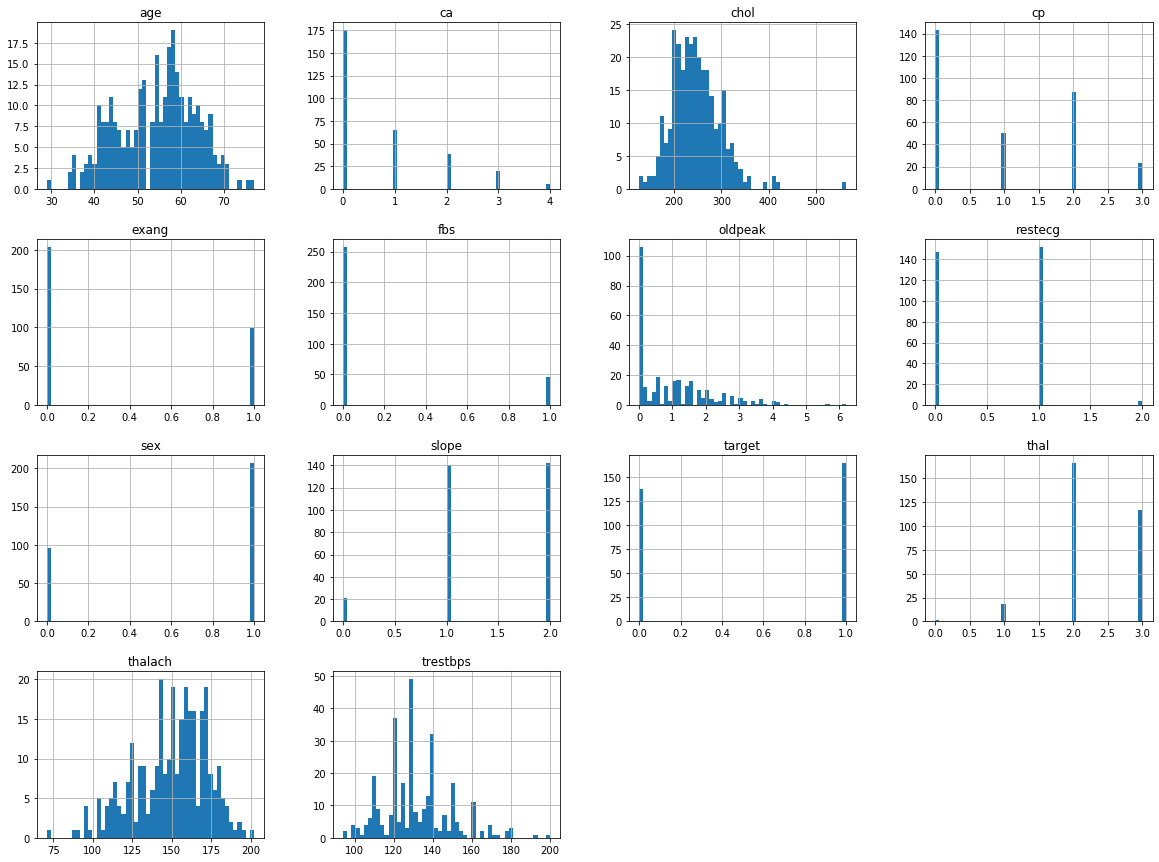

In [7]:
# explore each feature by plotting histograms
df.hist(bins=50, figsize=(20,15))
plt.show()

This shows how individual attributes are distributed, Nine of the fourteen features shuold be categorical as they show isolated columns at integer values of the x axis. The age and tresbps (resting blood pressure) features show a shapes which are close to normal distribution. The chol (serum cholestorol) shows a right skewed shape and there is a single (or couple) very high value at 564 which can be an outlier. The thalach (maximum heart rate achieved) shows a left skewed shape. The oldpeak (ST depression induced by exercise relative to rest) has a notably tall bar represents about 105 zero readings.  

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013F55ED7F08>,
      dtype=object)

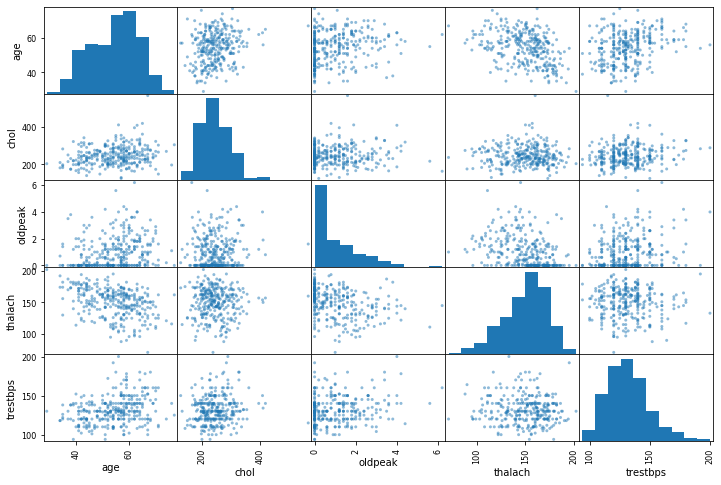

In [8]:
# scatter plots 
attributes = ["age", "chol", "oldpeak","thalach", "trestbps"]
scatter_matrix(df[attributes], figsize=(12, 8))

The scatterplots are created to check whether there are any correlations between the continuous variables in the dataset. We cannot observe any significant correlations between any pairs of features.

### Relationship of features to the target

A heatmap can be drawn using all the features of the dataset to further identify the correlations of the features with the target variable. 

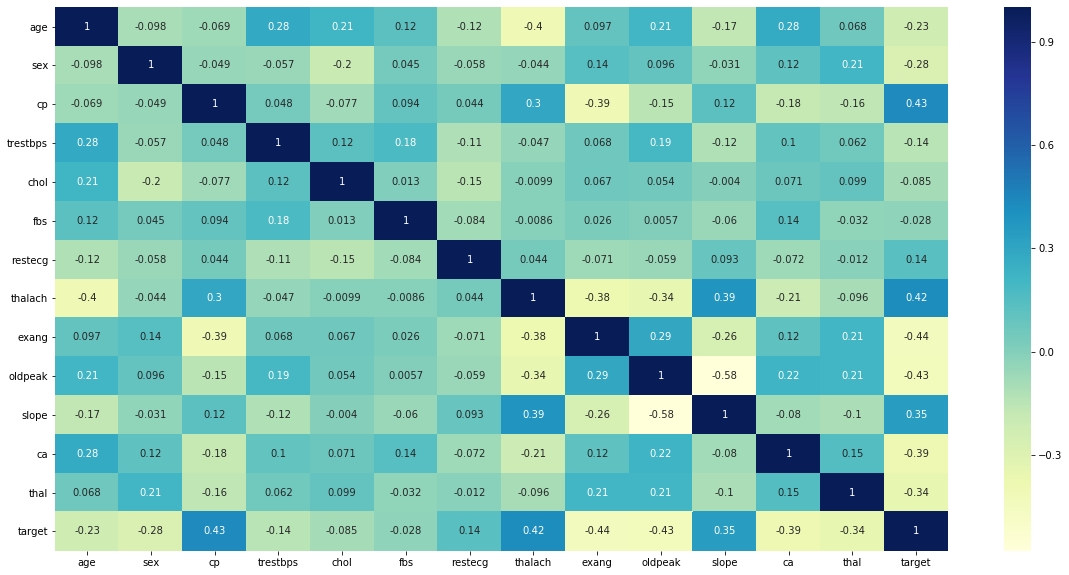

In [9]:
plt.figure(figsize =(20, 10))
sns.heatmap(df.corr(),annot= True, cmap="YlGnBu")

The heatmap exhibts that cp, thalach, and slope have moderately high positive correlations with the target column. Target is negatively correlated with sex, exang, ca, thal, and oldpeak. It is important to note that any feature do not have a notably high correlation with the target feature. 

In [10]:
# count values of target variable
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

165 people have heart diseases and 138 people do not have diseases. Let's draw a histogram for better visualization of this feature.

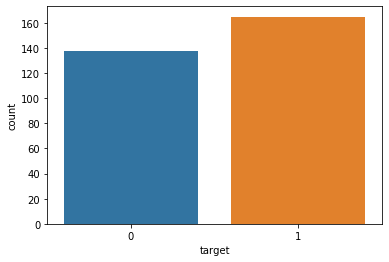

In [11]:
# histogram of having vs not having heart disease 
sns.countplot(x="target", data=df)

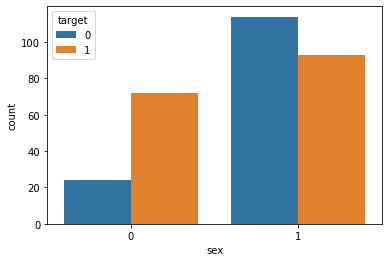

In [12]:
# relationship of gender to the target
sns.countplot(x="sex", hue="target", data=df)

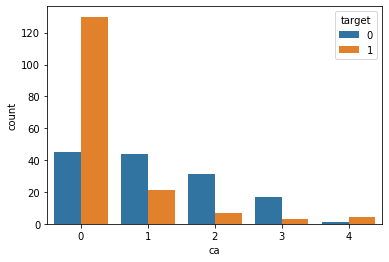

In [13]:
# relationship of ca to the target
sns.countplot(x="ca", hue="target", data=df)

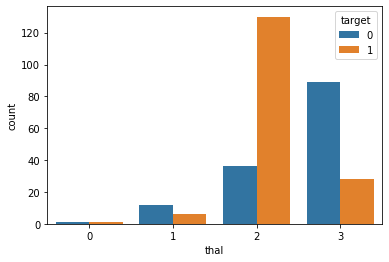

In [14]:
# relationship of thal to the target
sns.countplot(x="thal", hue="target", data=df)

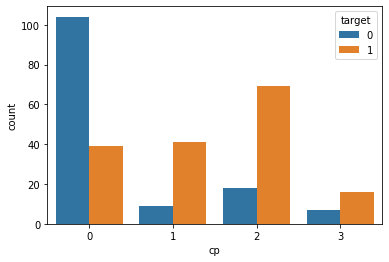

In [15]:
# relationship of cp to the target
sns.countplot(x="cp", hue="target", data=df)

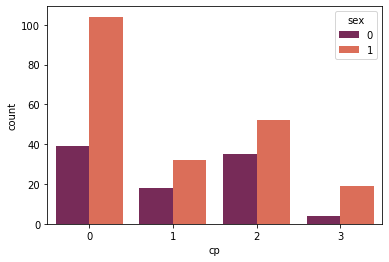

In [16]:
# relationship of cp to the sex
sns.countplot(x="cp", hue="sex", data=df,palette='rocket')

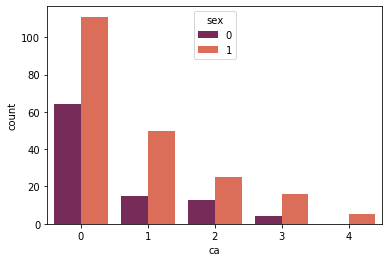

In [17]:
# relationship of ca to the sex
sns.countplot(x="ca", hue="sex", data=df,palette='rocket')

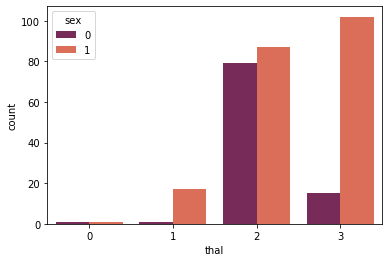

In [18]:
# relationship of thal to the sex
sns.countplot(x="thal", hue="sex", data=df,palette='rocket')

In [19]:
# count values of target variable
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

The dataset includes observations collected from 207 males and 96 females. The above graph shows that count for both having and not having heart disease are higher in males than females. Further the target columns exhibits that the percentage of females having heart disease is higher than males. We explore this further with the next plot.

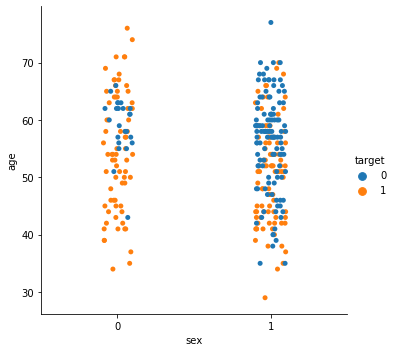

In [20]:
# relationship of age and gender to the target
sns.catplot(data= df, x= "sex", y= "age", hue= "target")

According to the figure above, the percentage of females having heart disease is higher than the percentage of male heart disease patients. Also, female heart disease patients are scattered across the whole age range whereas the male heart patients are mostly observed in the age below 55 years.  

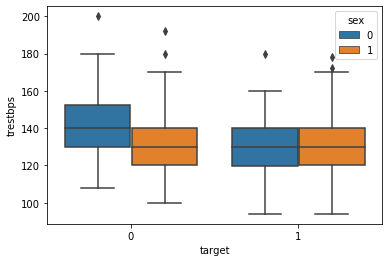

In [21]:
# relationship of tresbps with genders to target
sns.boxplot(x = df['target'], y = df['trestbps'], hue = df['sex'])

The boxplots show that females having heart diseases exhibit less tresbps with respect to the females do not have heart disease. Also, men and women have almost equal tresbps when they have heart diseses.

According to the plots above, we have outliers in trestbps, chol, oldpeak, ca, and thal.

### Feature Engineering

In this section, features will be manipulated to create model easily with the featues. It is important to detect all the outliers in the continuous variables and removed or replaced with suitable values before fitting to the model.

Let's draw box plots for all the features and visualize outliers.

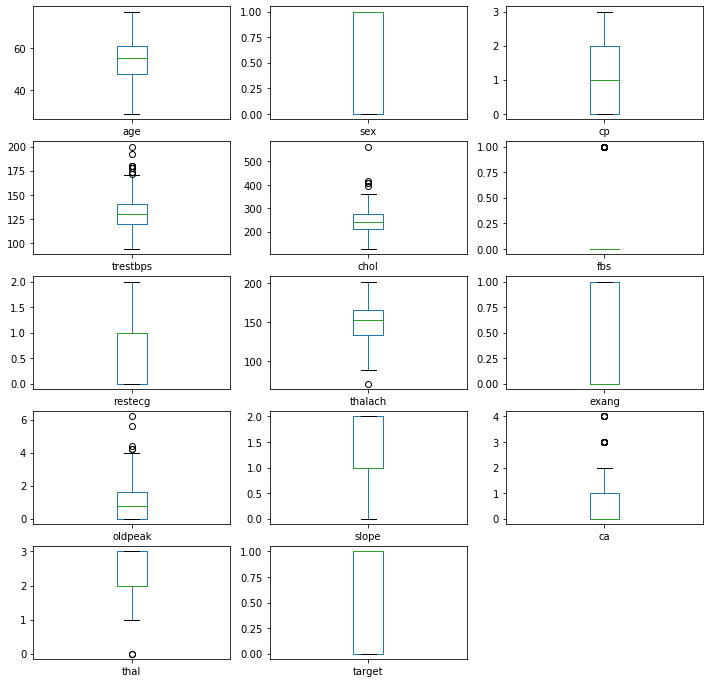

In [22]:
df.plot(kind='box', subplots= 'True', layout= (5,3), figsize= (12,12))
plt.show()

Three continuous variables (chol, trestbps, and oldpeak) consists of outliers. It is not a good idea to remove these observations as the dataset consists only with 303 data points. Therefore we will replace the outlier values with the median of each feature. The reason to select median instead of mean is that mean can be always affected by the extreme values, where median dose not affect. 

In [23]:
# find the median of chol feature
median= df['chol'].median()
    
# create the interquartile range of chol feature
quantile1, quantile3= np.percentile(df['chol'], [25,75])
iqr_value = quantile3 - quantile1
lower_bound = quantile1 - (1.5*iqr_value)
upper_bound = quantile3 + (1.5*iqr_value)
    
# assign all the observations beyond the lower and upper bounds as outliers
outl= df.loc[(df['chol'] > upper_bound) | (df['chol'] < lower_bound)]['chol']
df['chol'].replace(outl, median,inplace=True)

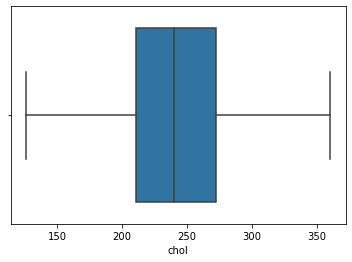

In [24]:
# confirm that the outliers are removed
sns.boxplot(x=df['chol'])

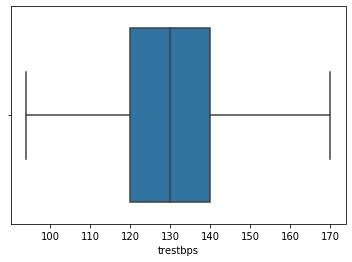

In [25]:
# repeat the above procedure to trestbps feature
median= df['trestbps'].median()
    
quantile1, quantile3= np.percentile(df['trestbps'], [25,75])
iqr_value = quantile3 - quantile1
lower_bound = quantile1 - (1.5*iqr_value)
upper_bound = quantile3 + (1.5*iqr_value)
    
    
outl= df.loc[(df['trestbps'] > upper_bound) | (df['trestbps'] < lower_bound)]['trestbps']
df['trestbps'].replace(outl, median,inplace=True)

# outliers of serum cholestorol
sns.boxplot(x=df['trestbps'])

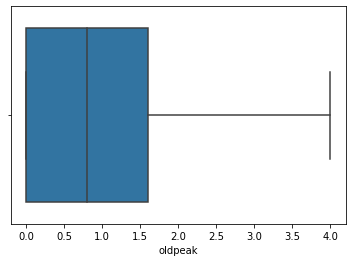

In [26]:
# repeat the above procedure to oldpeak feature
median= df['oldpeak'].median()
    
quantile1, quantile3= np.percentile(df['oldpeak'], [25,75])
iqr_value = quantile3 - quantile1
lower_bound = quantile1 - (1.5*iqr_value)
upper_bound = quantile3 + (1.5*iqr_value)
    
    
outl= df.loc[(df['oldpeak'] > upper_bound) | (df['oldpeak'] < lower_bound)]['oldpeak']
df['oldpeak'].replace(outl, median,inplace=True)

# outliers of serum cholestorol
sns.boxplot(x=df['oldpeak'])

The boxplots show that none of the three feature include outliers. Now we can use the data to create machine learning models.

## Part 2
In this part it is focused on below areas.
- Splitting data into train/test sets
- Build the model
- Predict test set using model
- A quantitative metric of model performance


## Split data into test and train sets

The following section will divide the dataset into test and training samples to be used in machine learning algorithm. 

First, the dependant variables (target) is separated and labelled as 'y' and the remaining set of independant variables are labelled as 'x'.

Next, we divide both x and y data into testing and training datasets. This is performed using the test train split tool with training: testing ratio as 8:2 respectively. This ratio is a commonly used in machine learning studies. Random state in splitting is set to 4 to make sure that the same combination of observations are selected as testing and training data at each time we run the code. 

In [27]:
# divide data to x and y (independant and dependant variables)
x = df.drop(['target'], axis= 1) # independant variables (axis = 1 to divide based on columns) 
y= df['target']  # dependant variables

In [28]:
# divide x and y into training and testing sets with 8:2 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=4)                                                                                      

In [29]:
# shapes of the training and testing datasets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(242, 13)
(61, 13)
(242,)
(61,)


Shape of the training and testing datasets show that the number of training 'x' data is 242 and it consists of 13 features while the length of training 'y' data is also 242 and consists of only one column, which is target. 
Similarly, the number of testing data is 42 and the dimensions are consistent with the training data.

## Training Model

Two machine learning algorithms are selected for this study. Logistic regression is used because the dataset has only two classes as the output. The dataset consists of relatively less number of data points compared to most of the machine learning studies. Support Vector Machine algorithm is selected as the second algorithm as it performs well even with less number of training and testing data.

### Support Vector Machine

First, Classification is performed with Support Vector Machine algorithm. SVM has three hyperparameters namely, gamma, c, and kernel. During the initial fitting of the model with training data, kernel is set to Radial Basis Function (rbf) and the other two set to default. 

In [30]:
# import support vector machine classifier and fit the model to training data
svm = SVC(kernel='rbf',random_state=0)
svm.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

Now the model is fit to training data and ready to test the model accuracy with testing data.

In [31]:
# accuracy score of the model with the testing set
svm.score(x_test,y_test)

0.5901639344262295

Accuracy of the model is almost 60% with the default hyperparameters. It is worth to check the accuracy of the model with training data scaled into a standard range with standard scaler. Standrdization will bring all the features into a common range which makes the machine learning algorithm to easy to train with and it will reduce the model fitting time. 

In [47]:
#scale the data into standatd scale
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Let's fit the algorithm again with the training data and test accuracy with the testing data.

In [33]:
# fit the model to the scaled data
svm = SVC(kernel='rbf',random_state=0,probability=True) #probability for predict_proba
svm.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=True, random_state=0, shrinking=True,
    tol=0.001, verbose=False)

In [34]:
# accuracy score of the model with the testing set
svm.score(x_test,y_test)

0.8524590163934426

The accuracy jumped from 59% to 85.24% after scaling. This is a much better value. We might be able to find even higher accuracy value by tuning hyperparameters of the SVM algorithm. 

The [Gridsearch](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) tool can be used to find the combination of hyperparameters which provides the highest classification accuracy. This is achieved by and iterative classification and validation process using all possible combinations of hyperparameters at each classification step.

In [35]:
# perform Gridsearch to find the best hyperparameters for the model
param_grid = {'C':[1,10,100,200],
              'kernel':['rbf','poly','linear','sigmoid'],
              'degree':[1,2,4,6],
              'gamma':[0.01,0.1,0.5,1]}

grid=GridSearchCV(SVC(), param_grid=param_grid, cv=4)
grid.fit(x_train,y_train)

y_pred = grid.predict(x_test)

print("Tuned Model Parameters: {}".format(grid.best_params_))

Tuned Model Parameters: {'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'sigmoid'}


The Gridsearch tool provided above parameters as the best combination of hyperparameters to achieve the highest classification accuracy. Let's train the model with the selected parameters and run the validation again.

In [36]:
# train the model with the best hyperparameters 
svm = SVC(C=1,kernel='poly',degree=1,gamma=0.5,probability=True)
svm.fit(x_train,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma=0.5, kernel='poly',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [37]:
# score of the best model with the testing set
svm.score(x_test,y_test)

0.9180327868852459

The accuracy for testing data with SVM classifier resulted in 91.80 %. Let's create a confusion matrix with the predicted results against the actual target values. The confusion matrix is used to visualize the number of observations classified correctly and incorrectly. We will use the heatmap tool of seaborn to create a nice graphical output of the confusion matrix.

In [38]:
# create confusion matrix with the predicted and real target labels
y_pred = svm.predict(x_test)
cm = confusion_matrix(y_pred,y_test)
print('Confusion Matrix \n',cm)

Confusion Matrix 
 [[22  2]
 [ 3 34]]


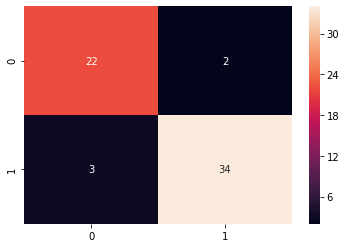

In [39]:
# plot the confusion matrix with the above results
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt="d") 
plt.show()

In [40]:
# classification results report
cr = classification_report(y_pred,y_test)
print('Classification Report\n',cr)

Classification Report
               precision    recall  f1-score   support

           0       0.88      0.92      0.90        24
           1       0.94      0.92      0.93        37

    accuracy                           0.92        61
   macro avg       0.91      0.92      0.91        61
weighted avg       0.92      0.92      0.92        61



### Logistic Regression

Logistic regression is a basic, yet a powerful model used in machine learning studies. The algorithm is selected for this project as the output is binary. 

Import logistic regression and fit the model to training data. The predict the output using test data. 

In [41]:
# import logistic regression function and fit the training data
lr=LogisticRegression()

model1=lr.fit(x_train,y_train)
prediction1=model1.predict(x_test)

Create a confusion matrix with the results of the model predictions and create a heatmap.

In [42]:
# create a confusion matrix with predicted and actual target 
cm=confusion_matrix(y_test,prediction1)
cm

array([[22,  3],
       [ 4, 32]], dtype=int64)

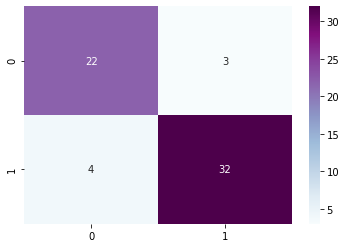

In [43]:
# plot confusion matrix
sns.heatmap(cm, annot=True,cmap='BuPu')

Testing accuracy of the logistic regression.

In [44]:
# accuracy of the classification
accuracy_score(y_test,prediction1)

0.8852459016393442

Create a classification accuracy report for logistic regression.

In [45]:
# classification accuracy report
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.85      0.88      0.86        25
           1       0.91      0.89      0.90        36

    accuracy                           0.89        61
   macro avg       0.88      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



Support Vector Machine resulted in 90.16% accuracy and Logistic Regresison resulted in 88.52% accuracy. Therefore, Support Vector Machine can be identified as the better classifier to predict whether a person is having or not having a heart disesase given the observations used in this study.